In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.spatial import distance as d
from colour import delta_E

image = cv2.imread(r"images\IMG_9361.JPG", cv2.IMREAD_ANYCOLOR)
# image_gray = cv2.imread(r"images\IMG_9361.JPG", cv2.IMREAD_GRAYSCALE)
max_temp = 21.4
min_temp = 15.8

temp_scale=np.linspace(max_temp, min_temp, num=837)

a = image[23:860,1209,:]

mapping = list(zip(temp_scale,a))

In [2]:
# calulating Euclidean distance between two points
# after finding E-delta method not used anymore
def euc_dis_rgb(a,b):
    y = (a[0]-b[0])**2
    u = (a[1]-b[1])**2
    g = (a[2]-b[2])**2
    res = 0.3*y+0.59*u+0.11*g
    return res

In [ ]:
# testing cell (ignore this)

_p = [1,2,3,4,5,6,7,8,9,10]
i=9.3
t=0
b=len(_p)-1
while t<b:
    mid =(t+b)//2 if (len(_p[t:b]))%2 == 0 else ((t+b)//2)+1
    if i*_p[t]>_p[mid]:
        t=mid
    else:
        b=mid

print(mid)

In [ ]:
res=[]
p = image[500,500]
t = 0
b = len(mapping) -1
mid=0
while t<b:
    # if t%2==0:
    #     len(mapping[b:t])/2
    #     mid = ((b + t)//2)
    # else:
    #     mid = ((b + t)//2)+1
    mid =(t+b)//2 if (len(mapping[t:b]))%2 == 0 else ((t+b)//2)+1
    euc_t = d.euclidean(mapping[t][1],p)
    euc_mid = d.euclidean(mapping[mid][1],p)
    euc_b = d.euclidean(mapping[b][1],p)
    print(t,euc_t,mid,euc_mid,b,euc_b)
    if euc_t<euc_mid:
        b = mid
    elif euc_mid<euc_b:
        t=mid
print(d.euclidean(mapping[t][1],p))


point color:  (23, 103, 244)
res1 281 2.48675431848 (19.517703349282296, array([ 26, 103, 253], dtype=uint8))
res2 280 7.28010988928 (19.524401913875597, array([ 27, 104, 250], dtype=uint8))


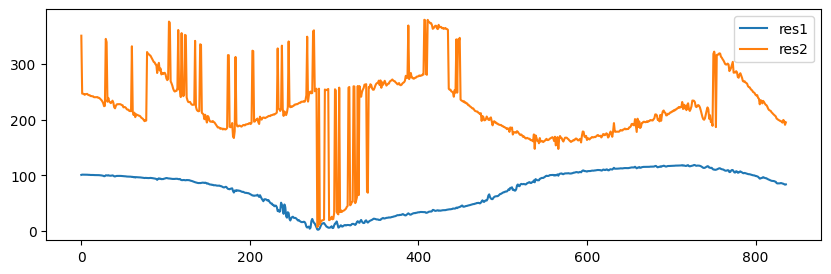

In [114]:
res1=[]
res2=[]
p = image[584,809]

for i in mapping:
    res1.append(delta_E(i[1],p))
    res2.append(d.euclidean(i[1],p))


min_res1 = min(set(res1))
min_res2 = min(set(res2))

min_res1_index = res1.index(min_res1)
min_res2_index = res2.index(min_res2)

# print(d.euclidean(p,mapping[0][1]),d.euclidean(mapping[0][1],p))

plt.rcParams["figure.figsize"] = (10,3)
# plt.plot([x for x in range(min([min_res1_index,min_res2_index])-1,
#                             1+max([min_res1_index,min_res2_index]))
#                             ],
#     res1[min([min_res1_index,min_res2_index])-1:1+max([min_res1_index,min_res2_index])])
# plt.plot([x for x in range(min([min_res1_index,min_res2_index])-1,
#                             1+max([min_res1_index,min_res2_index]))
#                             ],
#          res2[min([min_res1_index,min_res2_index])-1:1+max([min_res1_index,min_res2_index])])

plt.plot(res1)
plt.plot(res2)

plt.legend(["res1","res2"])
print("point color: ",tuple(p))
print("res1",min_res1_index, min_res1,mapping[min_res1_index])
print("res2",min_res2_index, min_res2,mapping[min_res2_index])


In [105]:
# finding the temperature of a pixel by calculating the closest color in scale using euclidean distance formula
def temp_cal(p):
    min_val = 1000
    temp_min = 1000
    res=[]
    for temp,values in mapping:
        # euc_dis = euc_dis_rgb(p,values)
        euc_dis = delta_E(p,values)
        res.append(euc_dis)
        if euc_dis<min_val:
            min_val=euc_dis
            temp_min = temp
    return temp_min
# print(f"The closest temp to point p({x},{y}) is {temp_min} degrees")

In [208]:
#average temp calc
# def average_temp(image,x,y,scale):
#     if scale==0:
#         return temp_cal(image=image,x=x,y=y)
#     tmp_val = 0
#     for i in range(x,x+scale):
#         for j in range(y,y+scale):
#             tmp_val+=temp_cal(image=image,x=x,y=y)
#     return tmp_val/(scale**2)

In [107]:
# finding the average color in a cube with the edge of 'scale' the point is located at the center of this cube
def average_color(image,x,y,scale):
    r,b,g=(0,0,0)
    for i in range(x-scale,x+scale+1):
        for j in range(y-scale,y+scale+1):
            r+=image[i,j,0]
            g+=image[i,j,1]
            b+=image[i,j,2]
    return int(r/(((scale*2)+1)**2)),int(g/(((scale*2)+1)**2)),int(b/(((scale*2)+1)**2))

In [112]:
# mask the image fo the parts in which the temperatue is above 'temperature'
def mask_image(image, temporature,scale=0):
    r_image_copy = cv2.imread(r"resized.JPG", cv2.IMREAD_ANYCOLOR)   
    x,y,_=image.shape
    for i in tqdm(range(scale,x-scale)):
        for j in range(scale,y-scale):
            if scale == 0:
                if temp_cal(image[i,j])>temporature:
                    r_image_copy[i,j]=255
                continue
            avg_col = average_color(image, i,j,scale)
            if temp_cal(avg_col)>temporature:
                r_image_copy[i,j]=255
    return r_image_copy


In [113]:
r_image = cv2.imread(r"resized.JPG", cv2.IMREAD_ANYCOLOR)

n_image = mask_image(r_image,19)
cv2.imwrite('images\test.jpg',n_image)            


100%|██████████| 87/87 [24:11<00:00, 16.69s/it]


True